In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc("font", size=13)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.model_selection import cross_val_score

In [2]:
pip install scikit-learn

In [4]:
loan_df = pd.read_csv("Loan_default.csv")

In [5]:
loan_df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

In [6]:
loan_df.head(10)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
5,A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1
6,H8GXPAOS71,38,111188,177025,429,80,1,19.11,12,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,Yes,0
7,0HGZQKJ36W,56,126802,155511,531,67,4,8.15,60,0.43,PhD,Full-time,Married,No,No,Home,Yes,0
8,1R0N3LGNRJ,36,42053,92357,827,83,1,23.94,48,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1
9,CM9L1GTT2P,40,132784,228510,480,114,4,9.09,48,0.33,High School,Self-employed,Married,Yes,No,Other,Yes,0


In [7]:
# Select columns with 'object' data type (assuming categorical variables are stored as objects)
categorical_columns = loan_df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['LoanID', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'],
      dtype='object')


In [8]:
loan_df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [9]:
# Drop irrelevant columns
loan_df = loan_df.drop(['LoanID'], axis=1)

# Handle missing values
loan_df = loan_df.dropna()

# Convert categorical variables to numerical
loan_df = pd.get_dummies(loan_df, columns=['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'])
print(loan_df.head())

   Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   56   85994       50587          520              80               4   
1   69   50432      124440          458              15               1   
2   46   84208      129188          451              26               3   
3   32   31713       44799          743               0               3   
4   60   20437        9139          633               8               4   

   InterestRate  LoanTerm  DTIRatio  Default  ...  HasMortgage_Yes  \
0         15.23        36      0.44        0  ...                1   
1          4.81        60      0.68        0  ...                0   
2         21.17        24      0.31        1  ...                1   
3          7.07        24      0.23        0  ...                0   
4          6.51        48      0.73        0  ...                0   

   HasDependents_No  HasDependents_Yes  LoanPurpose_Auto  \
0                 0                  1                 0   
1       

In [10]:
# Separate features (X) and target variable (y)
X = loan_df.drop('Default', axis=1)
y = loan_df['Default']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Define impurity indices and max_depth values to experiment with
impurity_indices = ['gini', 'entropy']
max_depths = [3, 5, 7, 10, 15, 20]

# Store results in a dictionary
results = {}

# Iterate over impurity indices and max_depth values
for impurity in impurity_indices:
    for depth in max_depths:
        # Create and evaluate the decision tree
        clf = DecisionTreeClassifier(criterion=impurity, max_depth=depth)
        scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
        results[(impurity, depth)] = scores.mean()

# Print results
for params, mean_accuracy in results.items():
    print(f"Impurity: {params[0]}, Max Depth: {params[1]}, Mean Accuracy: {mean_accuracy}")

Impurity: gini, Max Depth: 3, Mean Accuracy: 0.8838717510404909
Impurity: gini, Max Depth: 5, Mean Accuracy: 0.8845453439840391
Impurity: gini, Max Depth: 7, Mean Accuracy: 0.8847489890346468
Impurity: gini, Max Depth: 10, Mean Accuracy: 0.8807465852560986
Impurity: gini, Max Depth: 15, Mean Accuracy: 0.8565011574756112
Impurity: gini, Max Depth: 20, Mean Accuracy: 0.8225552013211119
Impurity: entropy, Max Depth: 3, Mean Accuracy: 0.8838717510404909
Impurity: entropy, Max Depth: 5, Mean Accuracy: 0.8846706648587102
Impurity: entropy, Max Depth: 7, Mean Accuracy: 0.884925219043979
Impurity: entropy, Max Depth: 10, Mean Accuracy: 0.882473653258096
Impurity: entropy, Max Depth: 15, Mean Accuracy: 0.8603508152158774
Impurity: entropy, Max Depth: 20, Mean Accuracy: 0.8303485003068314


In [16]:
# Initialize the Decision Tree model
clf = DecisionTreeClassifier(max_depth = 7)

# Fit the model on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [17]:
# Make predictions on the training data
y_train_pred = clf.predict(X_train)

In [18]:
# Evaluate the model
accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix = confusion_matrix(y_train, y_train_pred)
class_report = classification_report(y_train, y_train_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.8856993200409248
Confusion Matrix:
[[180111    413]
 [ 22936    817]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94    180524
           1       0.66      0.03      0.07     23753

    accuracy                           0.89    204277
   macro avg       0.78      0.52      0.50    204277
weighted avg       0.86      0.89      0.84    204277



In [19]:
# Make predictions on the testing data
y_pred = clf.predict(X_test)

In [20]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.8852555316232622
Confusion Matrix:
[[45019   151]
 [ 5709   191]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.56      0.03      0.06      5900

    accuracy                           0.89     51070
   macro avg       0.72      0.51      0.50     51070
weighted avg       0.85      0.89      0.84     51070



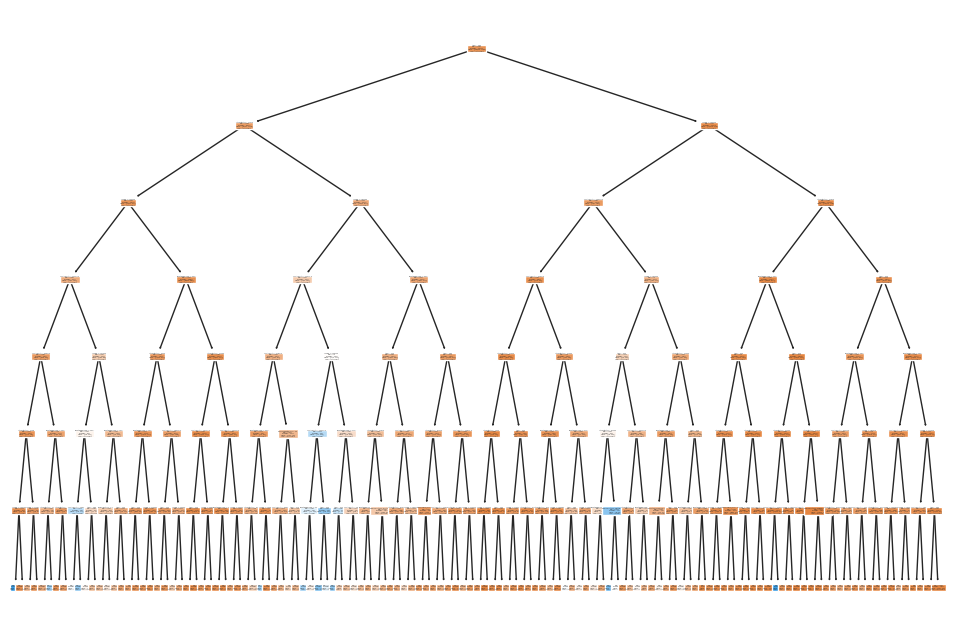

In [21]:
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=X.columns.tolist(), class_names=['Not Default', 'Default'], filled=True)
plt.show()
